DAY1

In [251]:
# from google.colab import files
# files.upload()

In [252]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [253]:
# !pip install kaggle

In [254]:
# !kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

In [255]:
# from google.colab import drive
# drive.mount('/content/drive')

In [256]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [257]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [258]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [259]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [260]:
numeric_cols=df.select_dtypes(include='number').columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean()) # checks the missing of numeric values

In [261]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

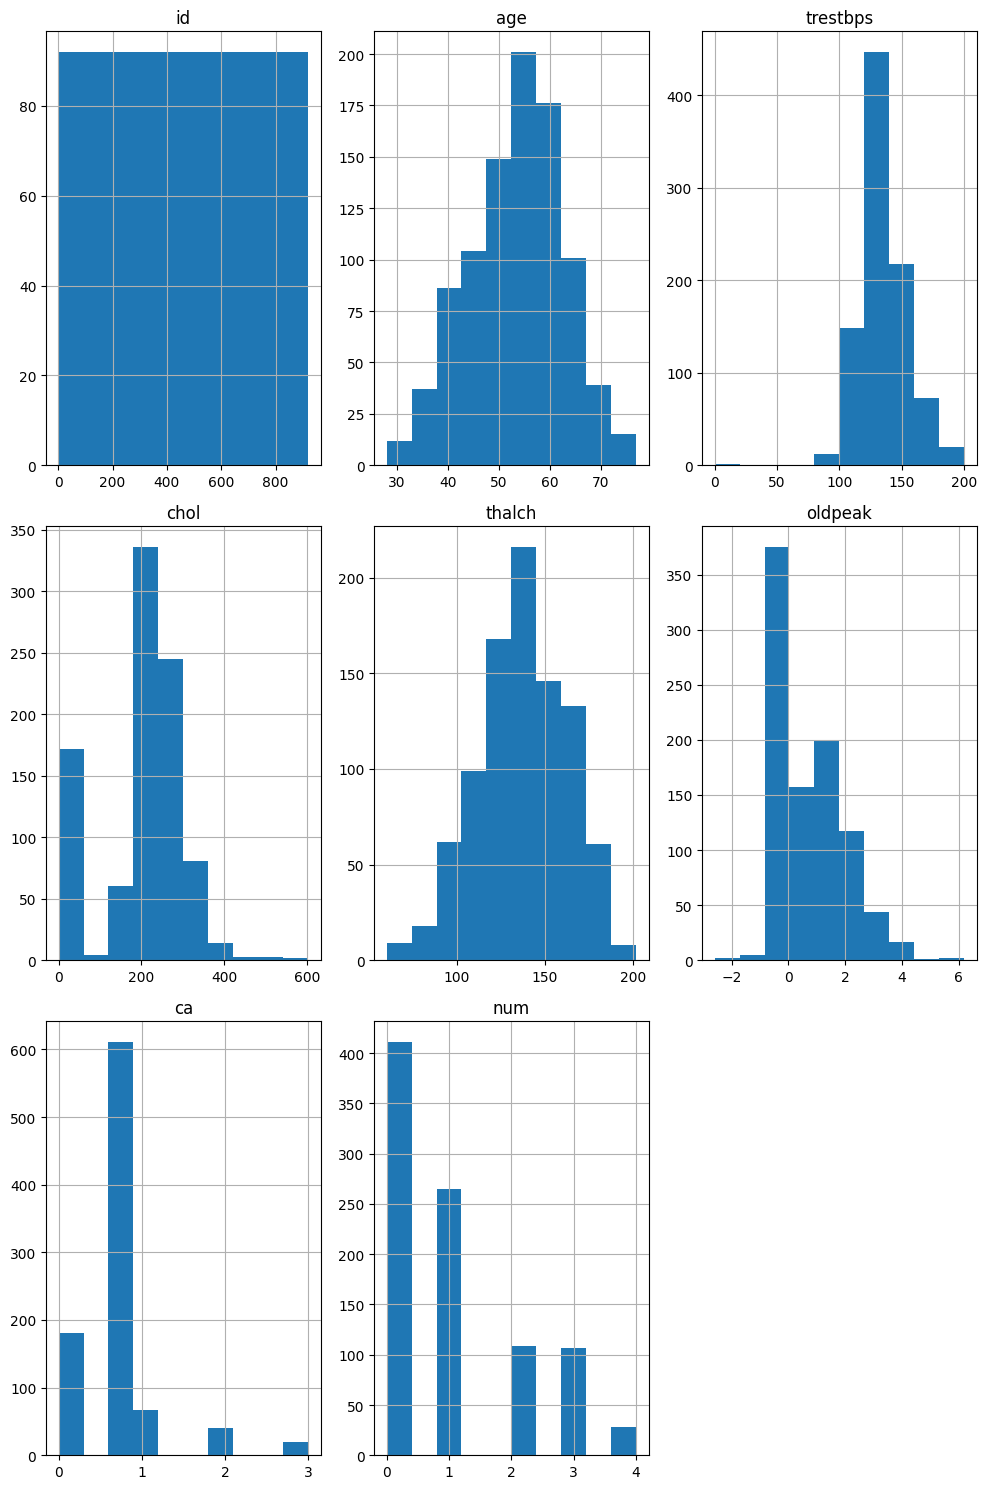

In [263]:
df[numeric_cols].hist(figsize=(10,15))
plt.tight_layout()
plt.show()

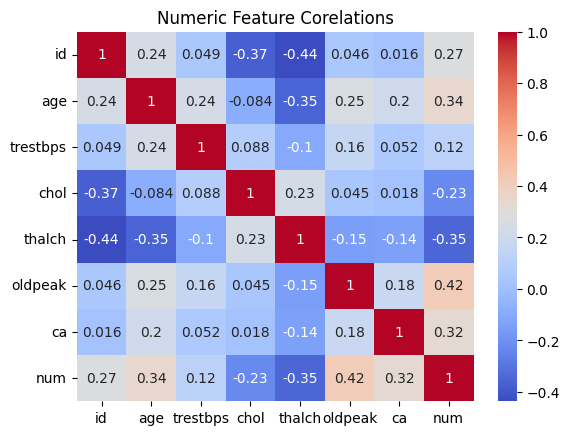

In [264]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Numeric Feature Corelations')
plt.show()

DAY 2 NODEL TRAINING

In [265]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [266]:
x = df.drop('num',axis=1)
y = (df['num'] > 0).astype(int)
cat_cols = x.select_dtypes(include='object').columns.tolist()

In [267]:
x = pd.get_dummies(x, columns=cat_cols)
print("Final feature columns:", x.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


DAY 3 Feature engg

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [269]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [270]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [271]:
from sklearn.linear_model import LogisticRegression

In [272]:
lr_model=LogisticRegression()
lr_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [273]:
from sklearn.metrics import accuracy_score , classification_report

In [274]:
y_pred_lr=lr_model.predict(x_test_scaled)
print("LogisticRegression Accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

LogisticRegression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



DAY 4

In [275]:
from sklearn.metrics import confusion_matrix

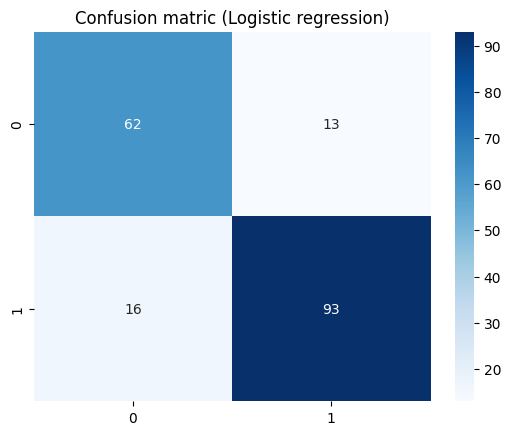

In [276]:
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matric (Logistic regression)')
plt.show()

Random forest

In [277]:
from sklearn.ensemble import RandomForestClassifier

In [278]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model. predict(x_test_scaled)

In [279]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


Feature Importance

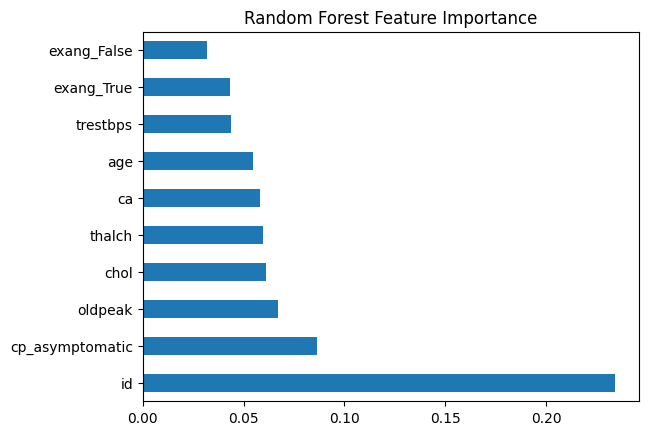

In [280]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

Save the model

In [281]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')

['heart_rf_model.pkl']

In [282]:
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [283]:
sample = x.head(1)
sample.to_csv('Heart_user_template.csv', index=False)
print("User Template saved as 'Heart_user_terplate.csv' ")

User Template saved as 'Heart_user_terplate.csv' 


Day 5


In [284]:
# from google.colab import files
# files.upload()

In [285]:
import joblib
import pandas as pd

user_df=pd.read_csv('heart_dataset.csv')
num_col = df.select_dtypes(include='number').columns.tolist()
cat_col = df.select_dtypes(include='object').columns.tolist()
bool_col = df.select_dtypes(include='bool').columns.tolist()


num_col = [col for col in num_col if col in user_df.columns]
cat_col = [col for col in cat_col if col in user_df.columns]
bool_col = [col for col in bool_col if col in user_df.columns]

user_df[num_col]=user_df[num_col].fillna(user_df[num_col].mean())

for col in cat_col:
  user_df[col]=user_df[col].fillna('unknown')

for col in bool_col:
  user_df[col]=user_df[col].astype(int)


user_df_encoded = pd.get_dummies(user_df,columns=cat_col)

user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value=0)

scaler = joblib.load("heart_scaler.pkl")
user_df_scaled = scaler.transform(user_df_encoded)

model = joblib.load("heart_rf_model.pkl")
pred = model.predict(user_df_scaled)
user_df['Heart_Disease_Pediction']=pred
print(user_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           